In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import sqlite3 as sql

print('All imports successful!')

All imports successful!


In [2]:
# Red wine quality dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.shape)
df.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.head(1).T

,0
fixed acidity,7.4000
volatile acidity,0.7000
citric acid,0.0000
residual sugar,1.9000
chlorides,0.0760
free sulfur dioxide,11.0000
total sulfur dioxide,34.0000
density,0.9978
pH,3.5100
sulphates,0.5600


## data is clean with no missing values & no formatting changes needed

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df[['alcohol','total sulfur dioxide','chlorides']].describe()

,alcohol,total sulfur dioxide,chlorides
count,1599.000000,1599.000000,1599.000000
mean,10.422983,46.467792,0.087467
std,1.065668,32.895324,0.047065
min,8.400000,6.000000,0.012000
25%,9.500000,22.000000,0.070000
50%,10.200000,38.000000,0.079000
75%,11.100000,62.000000,0.090000
max,14.900000,289.000000,0.611000


In [8]:
alcohol_mean = df['alcohol'].mean()
alcohol_median = df['alcohol'].median()

tot_sulf_mean = df['total sulfur dioxide'].mean()
tot_sulf_median = df['total sulfur dioxide'].median()

chlorides_mean = df['chlorides'].mean()
chlorides_median = df['chlorides'].median()

def detect_skewness(mean,median):
    if mean < median*0.9:
        return print("Left skew evident, inspect for low value outliers")
    elif mean > median*1.1:
        return print("Right skew evident, inspect for high value outliers")
    else:
        return print("Data appears symmetric")

print("Inspecting Alcohol Symmetry:")
detect_skewness(alcohol_mean,alcohol_median)
print('='*20)
print("Inspecting Total Sulfur Dioxide Symmetry:")
detect_skewness(tot_sulf_mean,tot_sulf_median)
print('='*20)
print("Inspecting Chlorides Symmetry:")
detect_skewness(chlorides_mean,chlorides_median)

Inspecting Alcohol Symmetry:
Data appears symmetric
Inspecting Total Sulfur Dioxide Symmetry:
Right skew evident, inspect for high value outliers
Inspecting Chlorides Symmetry:
Right skew evident, inspect for high value outliers


---
# Visuals

## Deliverable 4
**creating histograms for each of the 3 categories inspected for skewness**

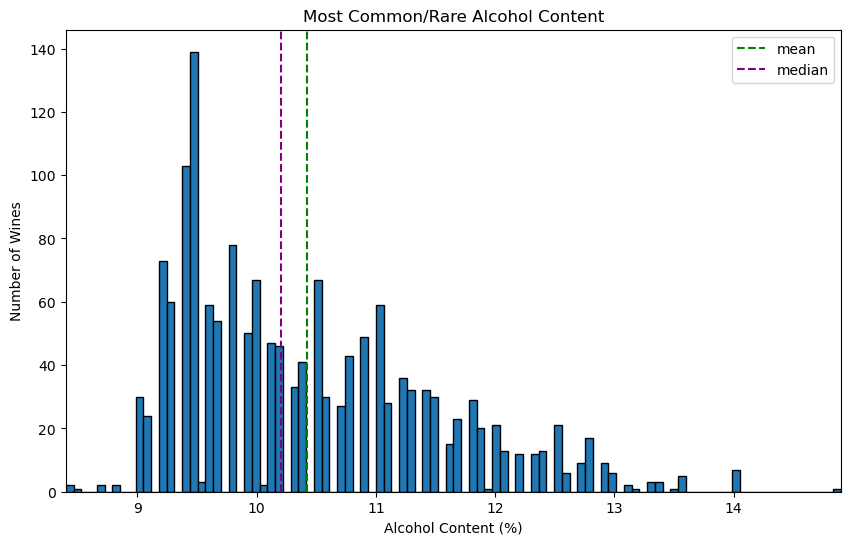

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['alcohol'], bins=100, edgecolor='black')
plt.xlim(df['alcohol'].min(), df['alcohol'].max())
plt.axvline(df['alcohol'].mean(), color='green', linestyle='--', label='mean')
plt.axvline(df['alcohol'].median(), color='purple', linestyle='--', label='median')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Number of Wines')
plt.title('Most Common/Rare Alcohol Content')
plt.legend()
plt.show()

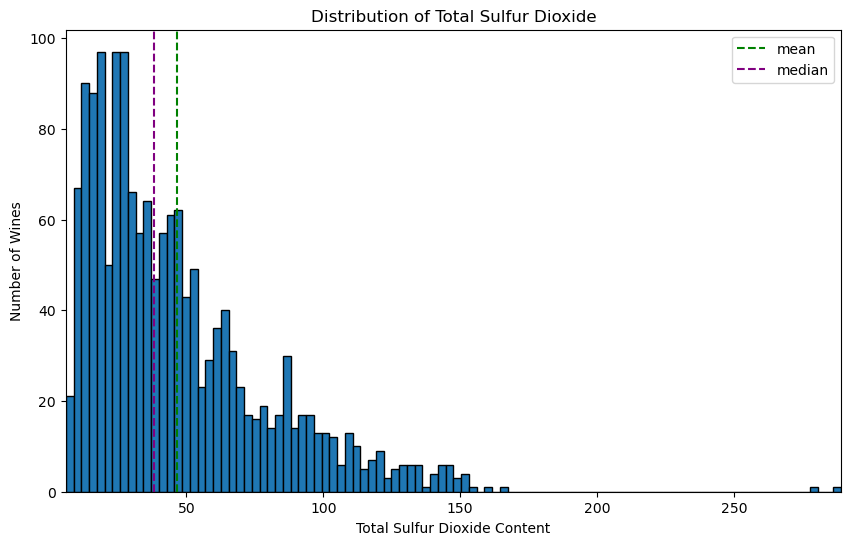

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['total sulfur dioxide'], bins=100, edgecolor='black')
plt.xlim(df['total sulfur dioxide'].min(), df['total sulfur dioxide'].max())
plt.axvline(df['total sulfur dioxide'].mean(), color='green', linestyle='--', label='mean')
plt.axvline(df['total sulfur dioxide'].median(), color='purple', linestyle='--', label='median')
plt.xlabel('Total Sulfur Dioxide Content')
plt.ylabel('Number of Wines')
plt.title('Distribution of Total Sulfur Dioxide')
plt.legend()
plt.show()

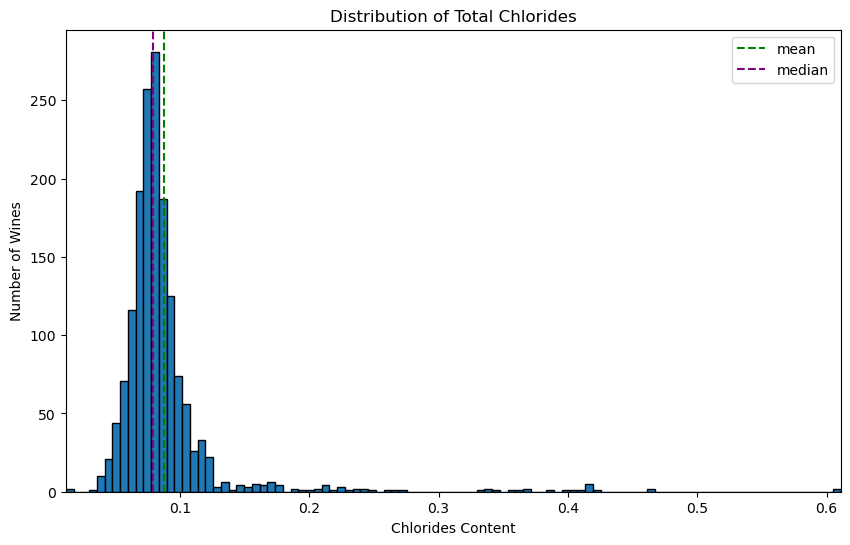

In [11]:
plt.figure(figsize=(10,6))
plt.hist(df['chlorides'], bins=100, edgecolor='black')
plt.xlim(df['chlorides'].min(), df['chlorides'].max())
plt.axvline(df['chlorides'].mean(), color='green', linestyle='--', label='mean')
plt.axvline(df['chlorides'].median(), color='purple', linestyle='--', label='median')
plt.xlabel('Chlorides Content')
plt.ylabel('Number of Wines')
plt.title('Distribution of Total Chlorides')
plt.legend()
plt.show()

## Data Analysis
**Interpretation between numerical and visual reports**
- Alcohol does appear symmetric, while Total Sulfur Dioxides and Chlorides to show right tails
- Although there is a statistical skew, the actual value differences may not indicate any practical difference

---
### Deliverable 5
**Group comparisons**
- Create boxplot comparing at least one numeric variable across quality scores
- What patterns do you see?

<Figure size 1000x600 with 0 Axes>

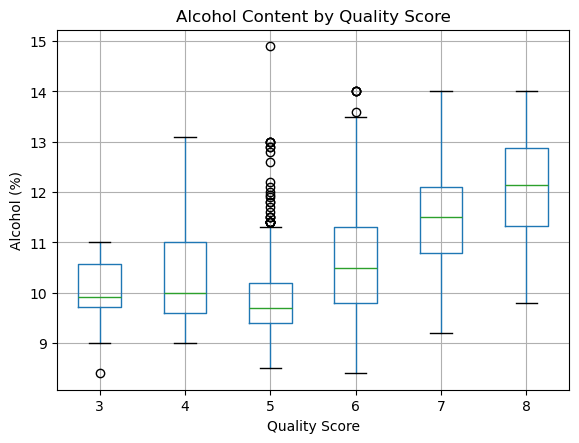

In [12]:
plt.figure(figsize=(10,6))
df.boxplot(column='alcohol', by='quality')
plt.suptitle('')
plt.title('Alcohol Content by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')
plt.show()

<Figure size 1000x600 with 0 Axes>

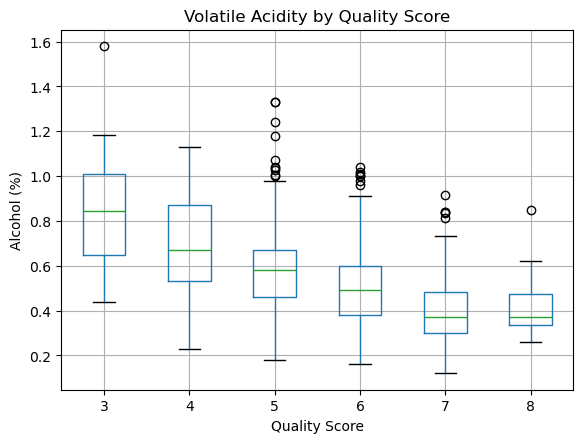

In [13]:
plt.figure(figsize=(10,6))
df.boxplot(column='volatile acidity', by='quality')
plt.suptitle('')
plt.title('Volatile Acidity by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')
plt.show()

---
## Deliverable 6
**Correlation analysis**
- Create 2-3 scatter plots exploring relationships
- Calculate correlation coefficients
- Which relationships are strongest?

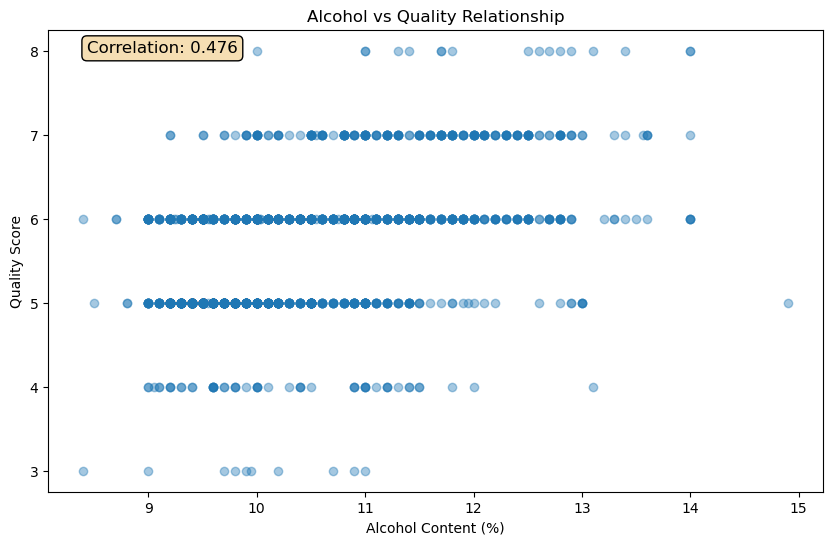

Correlation Coefficient: 0.476


In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df['alcohol'],df['quality'],alpha=0.4)
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Quality Score')
plt.title('Alcohol vs Quality Relationship')

corr = df['alcohol'].corr(df['quality'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat'))
plt.savefig('../../visuals/day12_scatter1.png')
plt.show()

print(f"Correlation Coefficient: {corr:.3f}")

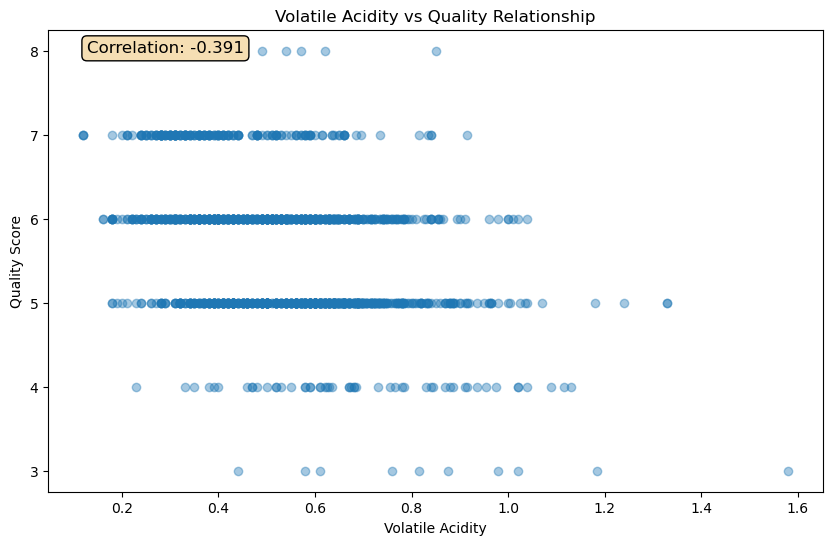

Correlation Coefficient: -0.391


In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df['volatile acidity'],df['quality'],alpha=0.4)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality Score')
plt.title('Volatile Acidity vs Quality Relationship')

corr = df['volatile acidity'].corr(df['quality'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat'))
plt.savefig('../../visuals/day12_scatter1.png')
plt.show()

print(f"Correlation Coefficient: {corr:.3f}")

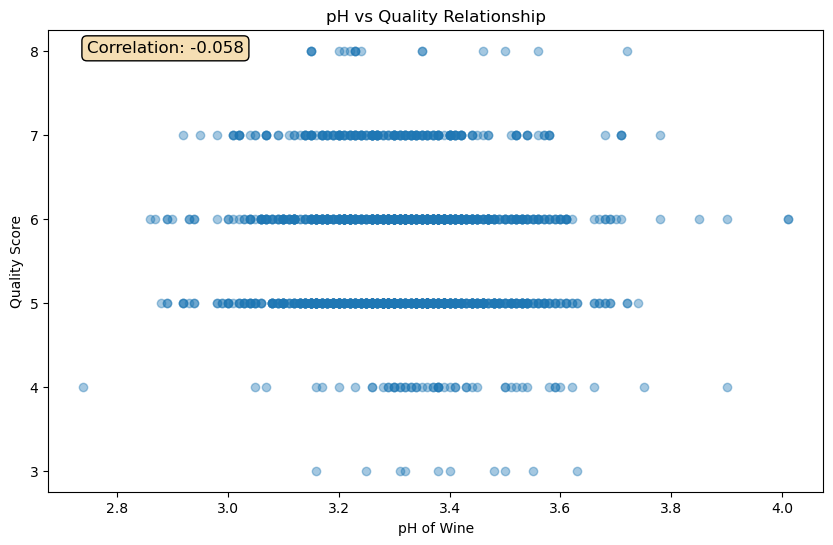

Correlation Coefficient: -0.058


In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df['pH'],df['quality'],alpha=0.4)
plt.xlabel('pH of Wine')
plt.ylabel('Quality Score')
plt.title('pH vs Quality Relationship')

corr = df['pH'].corr(df['quality'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat'))
plt.savefig('../../visuals/day12_scatter1.png')
plt.show()

print(f"Correlation Coefficient: {corr:.3f}")

# Insights:
**numerical evidence of moderate and positive relationship between alcohol and quality, while volatile acidity and quality have a slightly less impactful inverse correlation. And, pH shows a very weak negative correlation to quality**

## Deliverable 7 
**Hypothesis tests**
- Test 2-3 hypotheses using t-tests
- Example: "Do quality 8 wines have different alcohol than quality 3 wines?"
- Interpret p-values in business terms

In [17]:
print("Hypothesis Test: Alcohol Content & Quality\n")

group1 = df[df['quality'] == 8]['alcohol']
group2 = df[df['quality'] == 3]['alcohol']

print(f"Group 1: n={len(group1)}, mean={group1.mean():.2f}")
print(f"Group 2: n={len(group2)}, mean={group2.mean():.2f}")

statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Statistically significant difference (p < 0.05)")
else:
    print("Not statistically significant (p >= 0.05)")

print('='*50)

# repeat test with another category

print("\nHypothesis Test: Volatile Acidity & Quality\n")

group3 = df[df['quality'] == 8]['volatile acidity']
group4 = df[df['quality'] == 3]['volatile acidity']

print(f"Group 3: n={len(group1)}, mean={group3.mean():.2f}")
print(f"Group 4: n={len(group2)}, mean={group4.mean():.2f}")

statistic, p_value = stats.ttest_ind(group3, group4)

print(f"T-statistic: {statistic:.4f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Statistically significant difference (p < 0.05)")
else:
    print("Not statistically significant (p >= 0.05)")

Hypothesis Test: Alcohol Content & Quality

Group 1: n=18, mean=12.09
Group 2: n=10, mean=9.96
T-statistic: 4.9289
P-value: 0.00004
Statistically significant difference (p < 0.05)

Hypothesis Test: Volatile Acidity & Quality

Group 3: n=18, mean=0.42
Group 4: n=10, mean=0.88
T-statistic: -5.1417
P-value: 0.00002
Statistically significant difference (p < 0.05)


---
# Deliverable 8. 
**Business insights summary**
- Write 3-5 key findings
- Frame as actionable insights for a winery

**key findings:**
1. There is a notable and positive correlation between alcohol content and quality
2. There is a notable and negative correlation between volatile acidity and quality
3. In order to better advise wine vendors, I would need to see sales data (volume of sales and revenue)